# Import Necessary Libraries

In [1]:
import pandas as pd
import os

## Merging the 12 months data

In [2]:
files = [file for file in os.listdir('./Sales_Data')]
all_months_data = pd.DataFrame()
for file in files:
    df = pd.read_csv('./Sales_Data/'+file)
    all_months_data = pd.concat([all_months_data, df])

all_months_data.to_csv('all_data.csv', index=False)

In [3]:
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,222910,Apple Airpods Headphones,1,150,07/26/19 16:51,"389 South St, Atlanta, GA 30301"
1,222911,Flatscreen TV,1,300,07/05/19 08:55,"590 4th St, Seattle, WA 98101"
2,222912,AA Batteries (4-pack),1,3.84,07/29/19 12:41,"861 Hill St, Atlanta, GA 30301"
3,222913,AA Batteries (4-pack),1,3.84,07/28/19 10:15,"190 Ridge St, Atlanta, GA 30301"
4,222914,AAA Batteries (4-pack),5,2.99,07/31/19 02:13,"824 Forest St, Seattle, WA 98101"


### Updated DataFrame with all months included in one csv file

In [4]:
all_data = pd.read_csv('all_data.csv', index_col=0)
all_data.head()

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
Order ID,,,,,
222910,Apple Airpods Headphones,1,150,07/26/19 16:51,"389 South St, Atlanta, GA 30301"
222911,Flatscreen TV,1,300,07/05/19 08:55,"590 4th St, Seattle, WA 98101"
222912,AA Batteries (4-pack),1,3.84,07/29/19 12:41,"861 Hill St, Atlanta, GA 30301"
222913,AA Batteries (4-pack),1,3.84,07/28/19 10:15,"190 Ridge St, Atlanta, GA 30301"
222914,AAA Batteries (4-pack),5,2.99,07/31/19 02:13,"824 Forest St, Seattle, WA 98101"


In [5]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186850 entries, 222910 to 259357
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Product           186305 non-null  object
 1   Quantity Ordered  186305 non-null  object
 2   Price Each        186305 non-null  object
 3   Order Date        186305 non-null  object
 4   Purchase Address  186305 non-null  object
dtypes: object(5)
memory usage: 8.6+ MB


# Cleaning the data

In [6]:
# Checking for Nan in dataset
nan_df = all_data[all_data.isna()]
nan_df

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
Order ID,,,,,
222910,NaN,NaN,NaN,NaN,NaN
222911,NaN,NaN,NaN,NaN,NaN
222912,NaN,NaN,NaN,NaN,NaN
222913,NaN,NaN,NaN,NaN,NaN
222914,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
259353,NaN,NaN,NaN,NaN,NaN
259354,NaN,NaN,NaN,NaN,NaN
259355,NaN,NaN,NaN,NaN,NaN


In [53]:
# Removing the Nan values in all elements
all_data = all_data.dropna(how='all')
all_data.isna()      # confirm all Nan's are removed

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
Order ID,,,,,,,
222910,False,False,False,False,False,False,False
222911,False,False,False,False,False,False,False
222912,False,False,False,False,False,False,False
222913,False,False,False,False,False,False,False
222914,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
259353,False,False,False,False,False,False,False
259354,False,False,False,False,False,False,False
259355,False,False,False,False,False,False,False


In [54]:
print(all_data['Month'].unique())

[7 8 4 5 10 11 6 1 2 3 12 9]


In [55]:
# Find and delete "Or"
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

### Converting columns to correct type

In [56]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

# Checking the best month for sales and how much was earned

 ### 1. Creating months columns

In [57]:
# Extracting the month
all_data.loc[:, 'Month'] = all_data['Order Date'].str[0:2]

# Converting the Month column to int32
all_data.loc[:, 'Month'] = all_data['Month'].astype('int32')

# Display the first few rows
all_data.head()

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
Order ID,,,,,,,
222910,Apple Airpods Headphones,1,150.00,07/26/19 16:51,"389 South St, Atlanta, GA 30301",7,150.00
222911,Flatscreen TV,1,300.00,07/05/19 08:55,"590 4th St, Seattle, WA 98101",7,300.00
222912,AA Batteries (4-pack),1,3.84,07/29/19 12:41,"861 Hill St, Atlanta, GA 30301",7,3.84
222913,AA Batteries (4-pack),1,3.84,07/28/19 10:15,"190 Ridge St, Atlanta, GA 30301",7,3.84
222914,AAA Batteries (4-pack),5,2.99,07/31/19 02:13,"824 Forest St, Seattle, WA 98101",7,14.95


### 2. Creating sales column

In [58]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
Order ID,,,,,,,
222910,Apple Airpods Headphones,1,150.00,07/26/19 16:51,"389 South St, Atlanta, GA 30301",7,150.00
222911,Flatscreen TV,1,300.00,07/05/19 08:55,"590 4th St, Seattle, WA 98101",7,300.00
222912,AA Batteries (4-pack),1,3.84,07/29/19 12:41,"861 Hill St, Atlanta, GA 30301",7,3.84
222913,AA Batteries (4-pack),1,3.84,07/28/19 10:15,"190 Ridge St, Atlanta, GA 30301",7,3.84
222914,AAA Batteries (4-pack),5,2.99,07/31/19 02:13,"824 Forest St, Seattle, WA 98101",7,14.95


### 3. Checking the best month for sales

In [59]:
results = all_data.groupby('Month')[['Quantity Ordered', 'Price Each', 'Sales']].sum()
results

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


### 4. Visualize the monthly sales

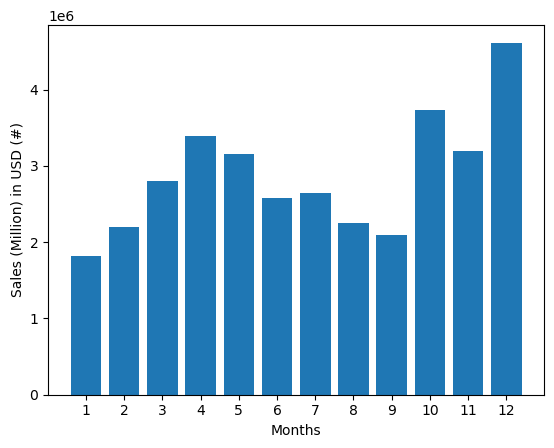

In [63]:
import matplotlib.pyplot as plt

months = range(1, 13)

plt.bar(months, results['Sales'])
plt.xticks(months)
plt.xlabel('Months')
plt.ylabel('Sales (Million) in USD (#)')
plt.show()


# Results 
## Insights from the data

### This shows that Decemeber is the best month in terms of sales with the highest sales of USD 4613443.34


# Checking City with the highest number of sales

### 1. Creating City Column

In [98]:
# Used lambda function to extract both city and state from 'Purchase Address'
all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{x.split(',')[1].strip()} ({x.split(',')[2].strip().split(' ')[0]})")
all_data.head() # check column created

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
Order ID,,,,,,,,
222910,Apple Airpods Headphones,1,150.00,07/26/19 16:51,"389 South St, Atlanta, GA 30301",7,150.00,Atlanta (GA)
222911,Flatscreen TV,1,300.00,07/05/19 08:55,"590 4th St, Seattle, WA 98101",7,300.00,Seattle (WA)
222912,AA Batteries (4-pack),1,3.84,07/29/19 12:41,"861 Hill St, Atlanta, GA 30301",7,3.84,Atlanta (GA)
222913,AA Batteries (4-pack),1,3.84,07/28/19 10:15,"190 Ridge St, Atlanta, GA 30301",7,3.84,Atlanta (GA)
222914,AAA Batteries (4-pack),5,2.99,07/31/19 02:13,"824 Forest St, Seattle, WA 98101",7,14.95,Seattle (WA)


### 2. Group by City and sum by sales

In [96]:
# Group by City and sum of the Sales
city_sales = all_data.groupby('City')['Sales'].sum()
city_sales

City
Atlanta (GA)          2795498.58
Austin (TX)           1819581.75
Boston (MA)           3661642.01
Dallas (TX)           2767975.40
Los Angeles (CA)      5452570.80
New York City (NY)    4664317.43
Portland (ME)          449758.27
Portland (OR)         1870732.34
San Francisco (CA)    8262203.91
Seattle (WA)          2747755.48
Name: Sales, dtype: float64

### 3. Visualization of the City sales

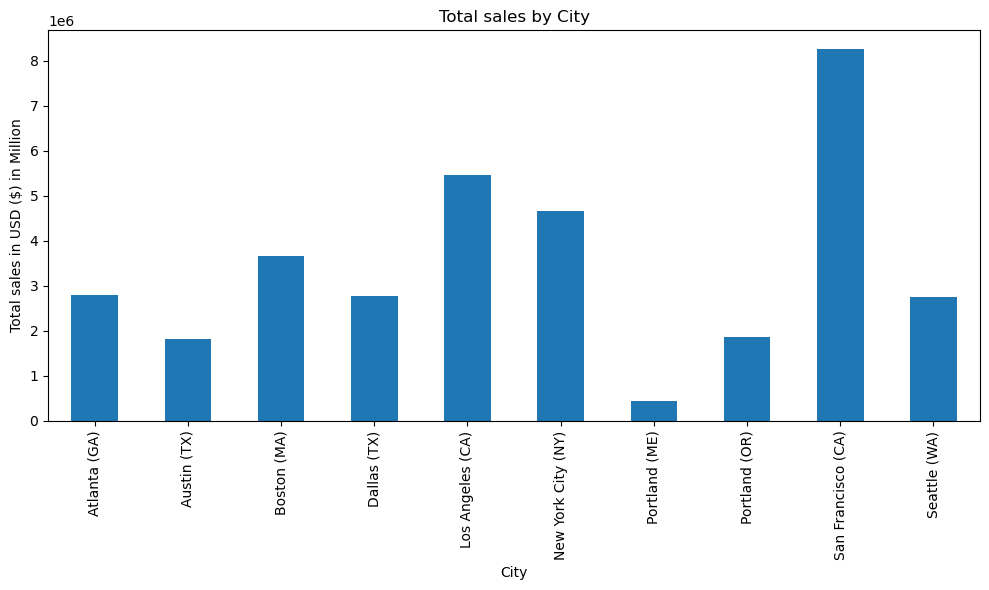

In [99]:
plt.figure(figsize=(10, 6)) # size of the graph
city_sales.plot(kind='bar')
plt.xlabel('City')
plt.xticks(rotation=90)
plt.ylabel('Total sales in USD ($) in Million')
plt.title('Total sales by City')
plt.tight_layout() # Adjust layout to prevent label clipping
plt.show()

# Results 
## Insights from the data

### We can conclude that San Francisco is the city with the highest number of sales

# Checking the best time to display adverts to maximize likelihood of a customer buying a product

### 1. Convert 'Order Date' using Datetime function

In [104]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'], format='%d%m%y %H:%M')
all_data.head()

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
Order ID,,,,,,,,
222910,Apple Airpods Headphones,1,150.00,2019-07-26 16:51:00,"389 South St, Atlanta, GA 30301",7,150.00,Atlanta (GA)
222911,Flatscreen TV,1,300.00,2019-07-05 08:55:00,"590 4th St, Seattle, WA 98101",7,300.00,Seattle (WA)
222912,AA Batteries (4-pack),1,3.84,2019-07-29 12:41:00,"861 Hill St, Atlanta, GA 30301",7,3.84,Atlanta (GA)
222913,AA Batteries (4-pack),1,3.84,2019-07-28 10:15:00,"190 Ridge St, Atlanta, GA 30301",7,3.84,Atlanta (GA)
222914,AAA Batteries (4-pack),5,2.99,2019-07-31 02:13:00,"824 Forest St, Seattle, WA 98101",7,14.95,Seattle (WA)


### 2. Create Hour and Minute columns

In [107]:
all_data['Hour'] = all_data['Order Date'].dt.hour # create Hour column - extract hour using dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute # create Minute column
all_data.head()

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
Order ID,,,,,,,,,,
222910,Apple Airpods Headphones,1,150.00,2019-07-26 16:51:00,"389 South St, Atlanta, GA 30301",7,150.00,Atlanta (GA),16,51
222911,Flatscreen TV,1,300.00,2019-07-05 08:55:00,"590 4th St, Seattle, WA 98101",7,300.00,Seattle (WA),8,55
222912,AA Batteries (4-pack),1,3.84,2019-07-29 12:41:00,"861 Hill St, Atlanta, GA 30301",7,3.84,Atlanta (GA),12,41
222913,AA Batteries (4-pack),1,3.84,2019-07-28 10:15:00,"190 Ridge St, Atlanta, GA 30301",7,3.84,Atlanta (GA),10,15
222914,AAA Batteries (4-pack),5,2.99,2019-07-31 02:13:00,"824 Forest St, Seattle, WA 98101",7,14.95,Seattle (WA),2,13


In [109]:
time_sales = all_data.groupby('Hour')['Sales'].count()
all_data.head()

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
Order ID,,,,,,,,,,
222910,Apple Airpods Headphones,1,150.00,2019-07-26 16:51:00,"389 South St, Atlanta, GA 30301",7,150.00,Atlanta (GA),16,51
222911,Flatscreen TV,1,300.00,2019-07-05 08:55:00,"590 4th St, Seattle, WA 98101",7,300.00,Seattle (WA),8,55
222912,AA Batteries (4-pack),1,3.84,2019-07-29 12:41:00,"861 Hill St, Atlanta, GA 30301",7,3.84,Atlanta (GA),12,41
222913,AA Batteries (4-pack),1,3.84,2019-07-28 10:15:00,"190 Ridge St, Atlanta, GA 30301",7,3.84,Atlanta (GA),10,15
222914,AAA Batteries (4-pack),5,2.99,2019-07-31 02:13:00,"824 Forest St, Seattle, WA 98101",7,14.95,Seattle (WA),2,13


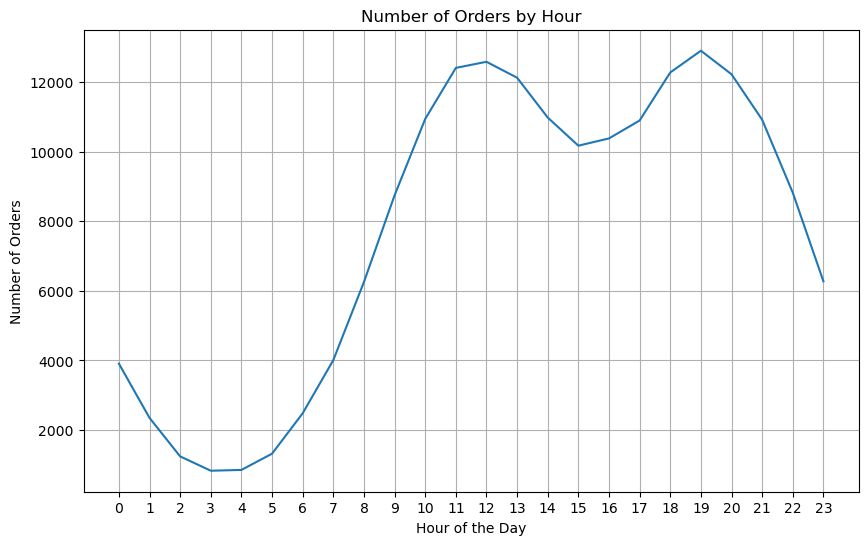

In [125]:
plt.figure(figsize=(10, 6))  # Set the size of the graph
time_sales.plot(kind='line')  # Plot the line graph
plt.xlabel('Hour of the Day')
plt.xticks(time_sales.index)
plt.ylabel('Number of Orders
plt.title('Number of Orders by Hour')
plt.grid(True)  # Grid lines for better readability
plt.show()

# Results 
## Insights from the data

### The best hours for advertising products is between 10 AM - 12 PM and 5 PM - 7PM 